In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
#plt.rcParams['figure.figsize'] = (20., 15.)
#plt.rcParams['font.size'] = 20

Importing the data

In [3]:
data = pd.read_csv("data_source/income_GDP_data.csv")

In [4]:
numerical_variables = data.keys().tolist()
del numerical_variables[0], numerical_variables[0], numerical_variables[-1]

## Fullness of the dataset

Fullness of data per variable

In [5]:
(-data[numerical_variables].isnull().sum() + len(data)) / len(data)

gini_DS                        0.195310
Q1_DS                          0.072351
Q2_DS                          0.072351
Q3_DS                          0.072351
Q4_DS                          0.072425
D1_WB                          0.104556
D9_WB                          0.104556
QU1_WB                         0.104556
QU2_WB                         0.104556
QU3_WB                         0.104556
QU4_WB                         0.104556
QU5_WB                         0.104556
GDP_MP_WB                      0.825542
GDP_OECD                       0.165999
GDP_CAP_OECD                   0.160137
gini_post_taxe_OECD            0.029015
gini_before_taxe_OECD          0.040739
median_income_OECD             0.033838
palma_OECD                     0.033838
P90/P10_OECD                   0.033615
P90/P50_OECD                   0.033615
P50/P10_OECD                   0.033615
S80/S20_OECD                   0.033838
S90/S10_OECD                   0.033838
D1_WID                         0.032799


Fullness of data per country

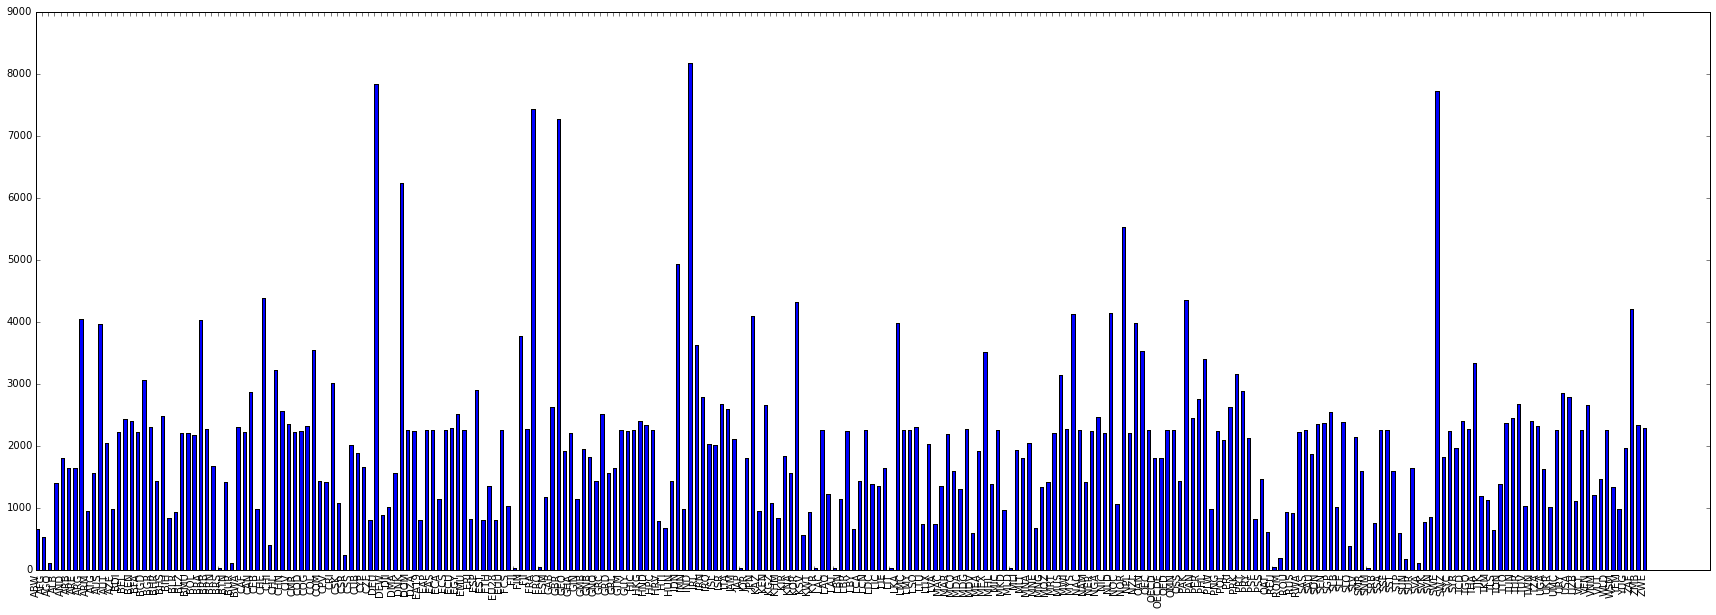

In [6]:
graph = pd.DataFrame(pd.DataFrame(data['code']).join(data[numerical_variables].isnull()).groupby('code').sum().sum(axis=1))
graph.columns = ['size']
x = np.arange(len(graph)) * 1.5
labels = graph.index.tolist()
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(x, graph['size'])
plt.xticks(x, labels, rotation='vertical')
plt.savefig("country_data_distribution")
plt.show()

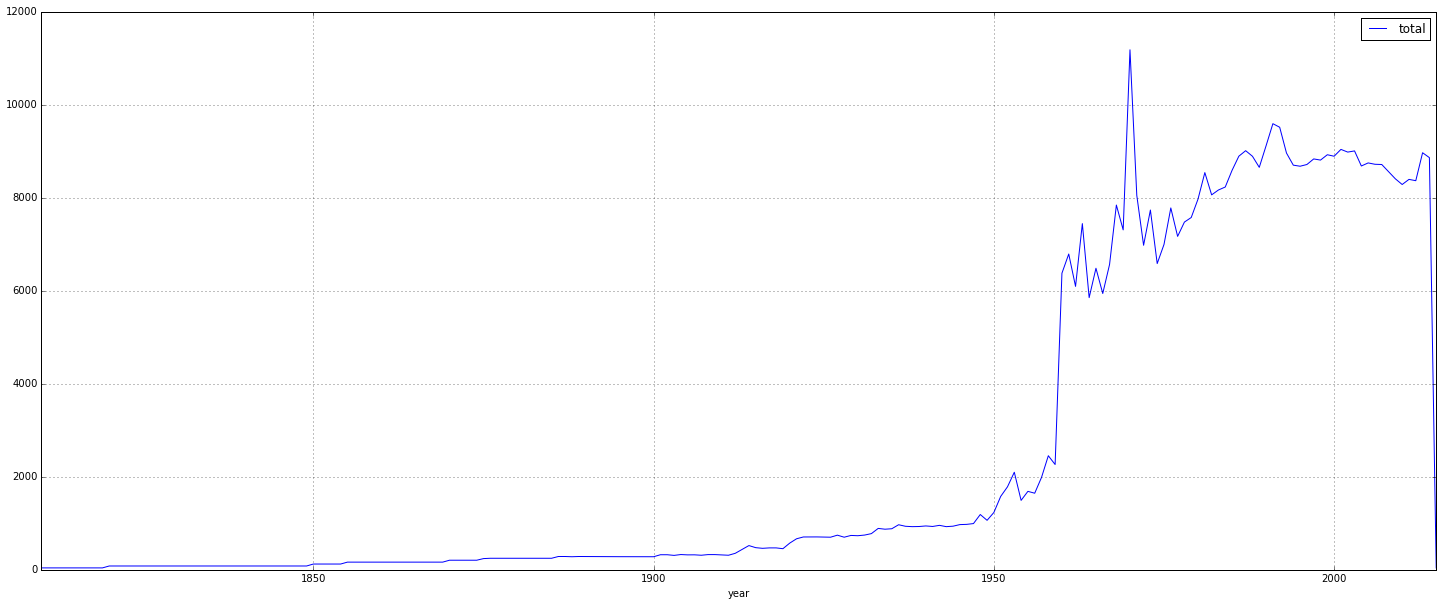

In [7]:
graph = pd.DataFrame(pd.DataFrame(data['year']).join(data[numerical_variables].isnull()).groupby('year').sum().sum(axis=1))
graph.columns = ['total']
graph.plot(figsize=(25,10))

## Correlation between variables

In [8]:
country = 'FRA'

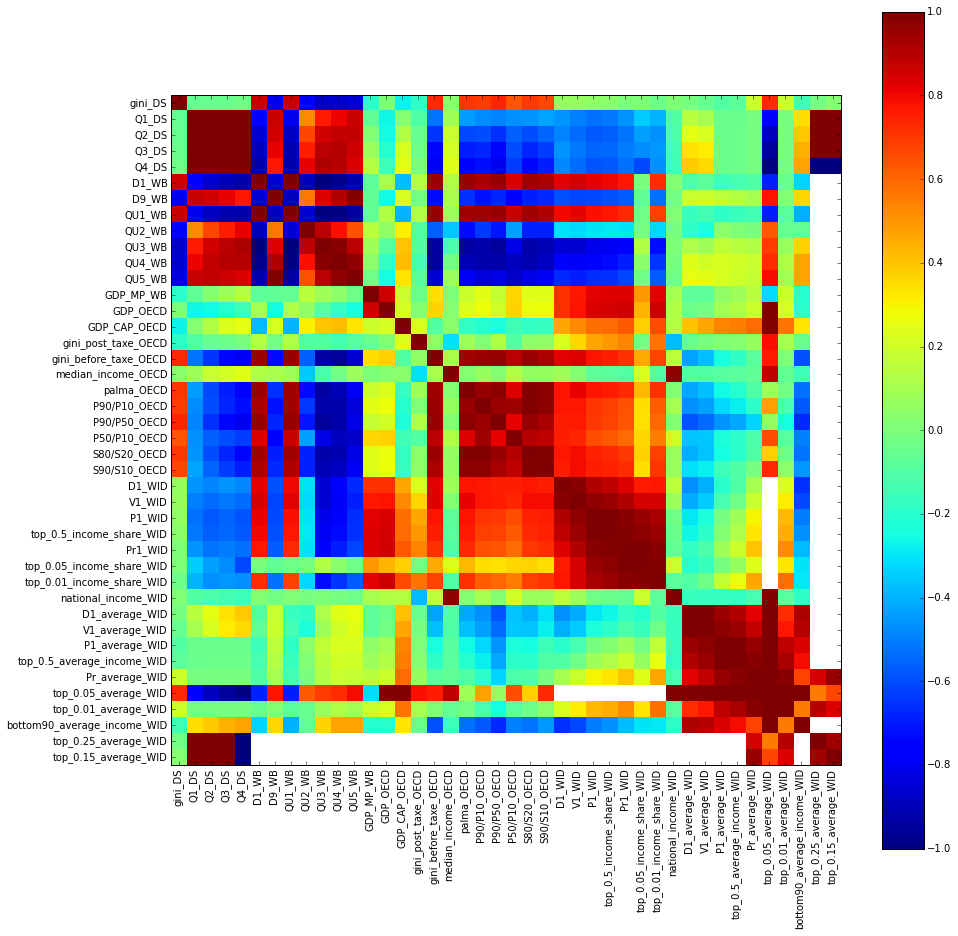

In [9]:
selection = data.copy()
selection.index = selection['year']
selection = selection[numerical_variables]
correlations = selection.corr()
fig = plt.figure(figsize=(15,15))
plt.imshow(correlations, interpolation='nearest')
plt.xticks(range(0, len(selection.columns)), selection.columns, rotation='vertical')
plt.yticks(range(0, len(selection.columns)), selection.columns, rotation='horizontal')
plt.colorbar()
plt.savefig("correlations_variables.png")

Impossible to make easily a PCA because of missing data TODO aks Pierre what to do

## Dataviz

Selects randomly a country and simply plots all the data. 

Country :  SGP


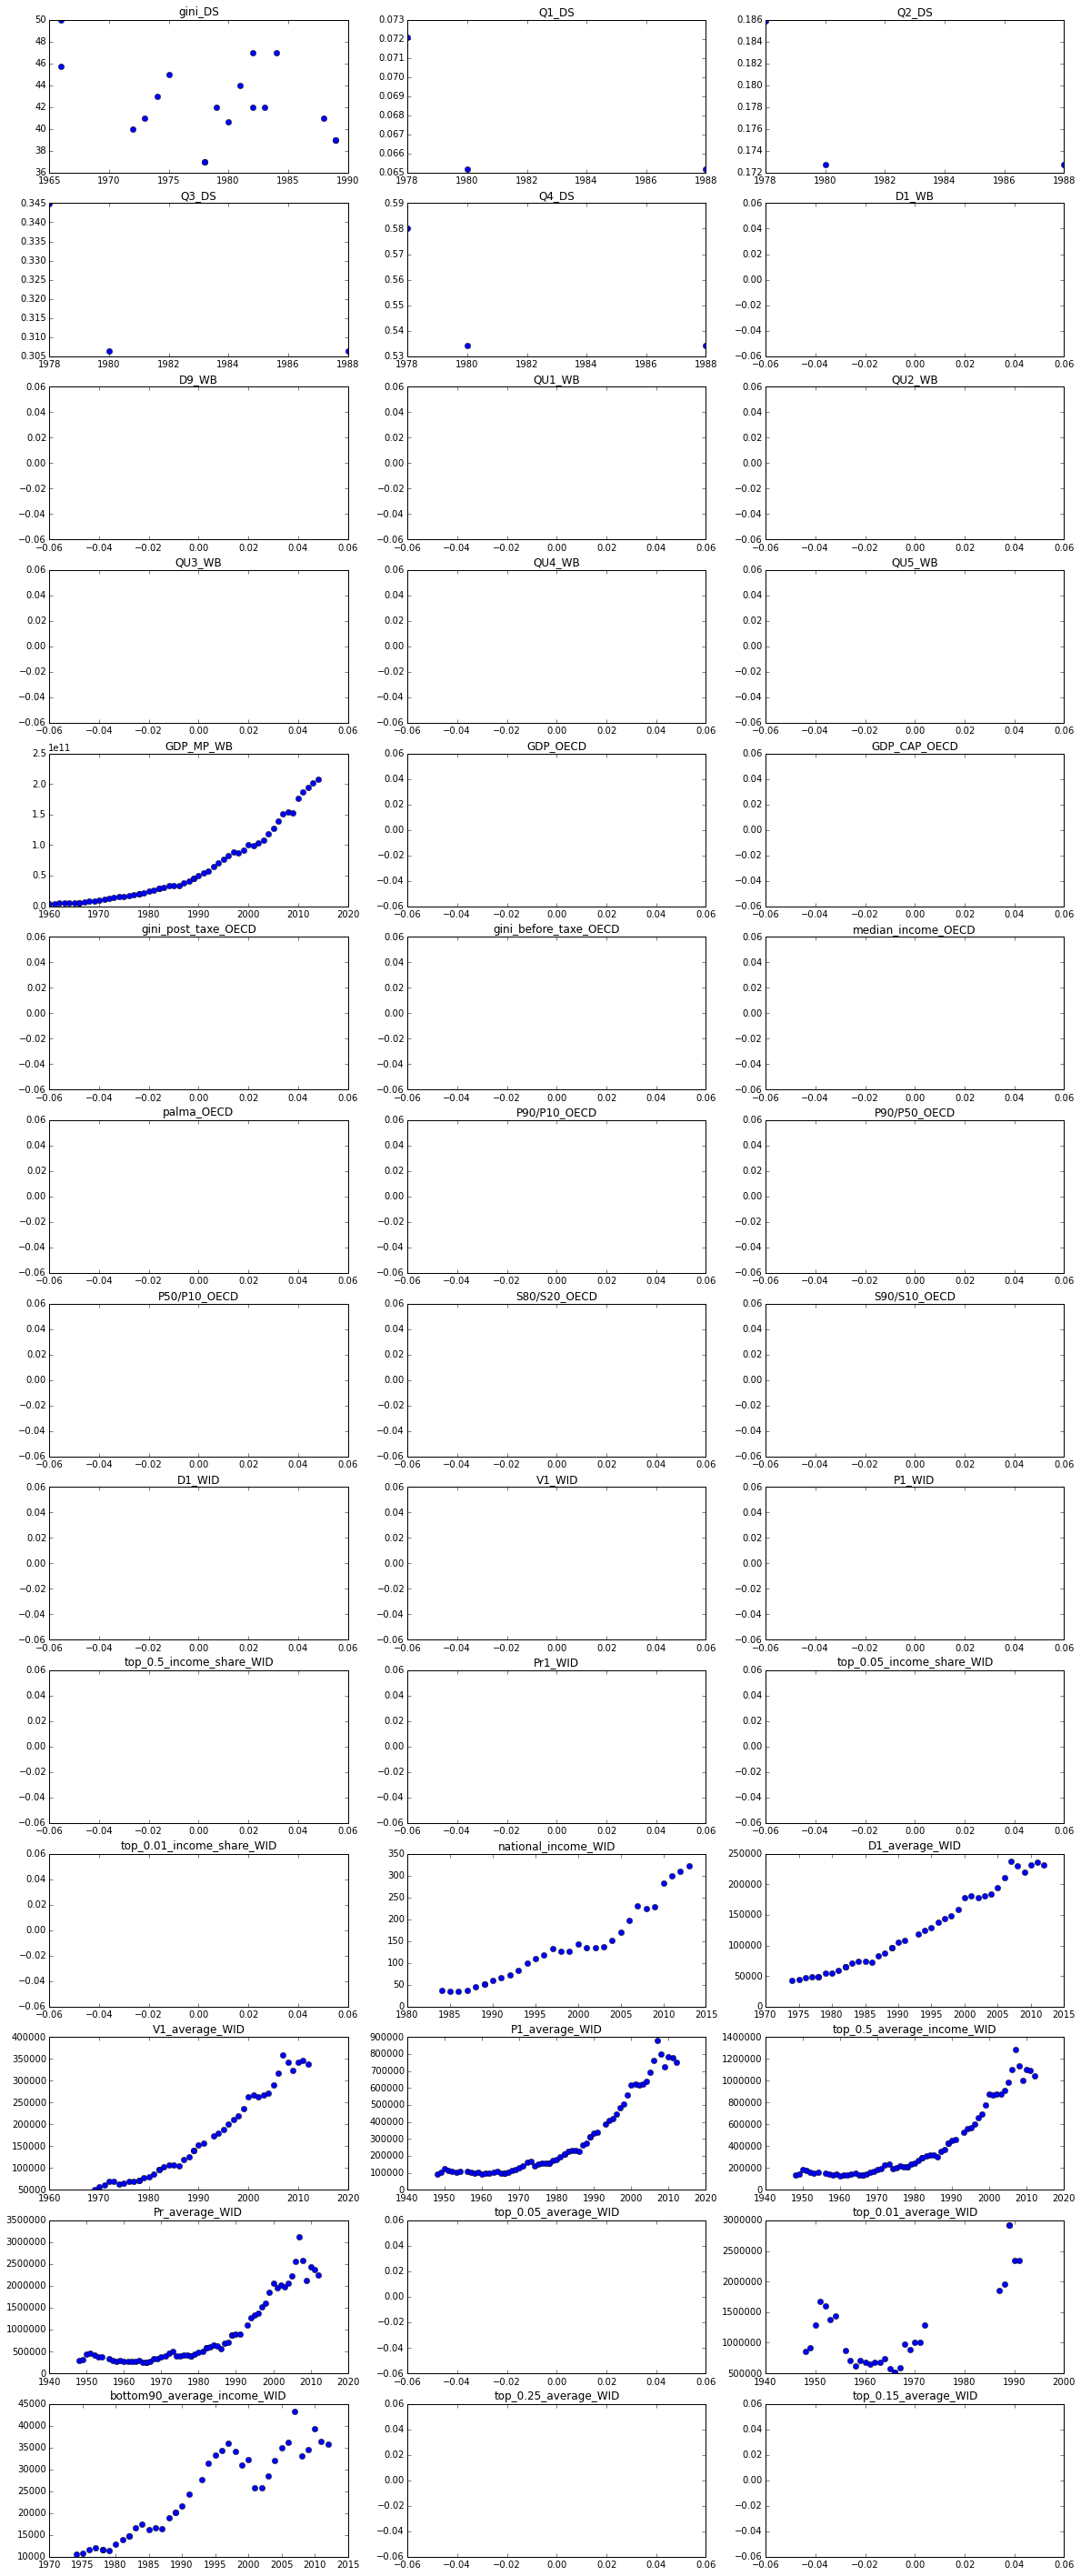

In [10]:
country = np.random.choice(data['code'])
print "Country : ", country
selection = data[data['code']==country]
f, axarr = plt.subplots(14, 3, figsize=(20,50))
x = selection['year']
for n, var in enumerate(numerical_variables):
    i,j = n/3, n%3
    y = selection[var]
    axarr[i, j].plot(x, y, 'o')
    axarr[i, j].set_title(var)